In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns



In [2]:
df = pd.read_excel("hotel_reviews.xlsx")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [4]:
# Count null values

df.isna().sum()

Review    0
Rating    0
dtype: int64

<Axes: >

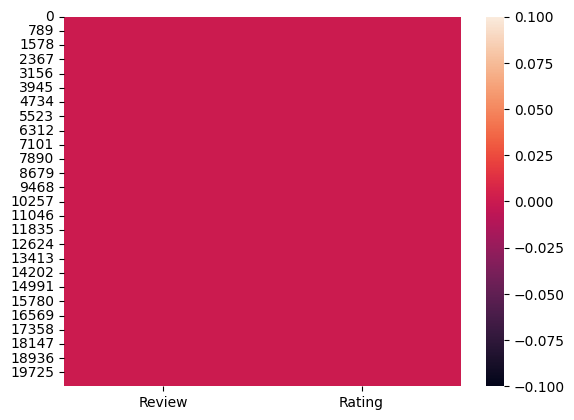

In [5]:
sns.heatmap(df.isna())

In [6]:
# Check if there any duplicated values

df.duplicated().sum()

0

In [7]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [8]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
import string #collection of alphabets,words or other characters
from nltk import pos_tag # Part-of-Speech (POS) tagging
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer # Splits on and discards only whitespace characters
from nltk.stem import WordNetLemmatizer # lemmatize a word
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Mohan
[nltk_data]     Gola\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Mohan
[nltk_data]     Gola\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Mohan
[nltk_data]     Gola\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mohan
[nltk_data]     Gola\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mohan Gola\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
from nltk.corpus import wordnet # Large lexical database of English words
import nltk # package for NLP
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [10]:
def clean_text(text):
    # remove \t
    text = text.replace('\t', '')
    # lower text
    text = text.lower()
    # tokenize text and remove punctuation
    text = [word.strip(string.punctuation) for word in word_tokenize(text)]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]

    # Convert stopwords to a list
    stop_words = set(stopwords.words('english'))

    # remove stop words
    text = [x for x in text if x not in stop_words]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = ' '.join(text)
    return text


In [11]:
df['Cleaned_Review'] = df['Review'].apply(lambda x: clean_text(x))
df.head()


,Review,Rating,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...


In [12]:
df['Review'].value_counts()

Review
nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,                                                                                                                                                                                                                                                                                                                                                                                                                  

In [13]:
df['Cleaned_Review'].value_counts()

Cleaned_Review
nice hotel expensive parking get good deal stay hotel anniversary arrive late evening take advice previous review valet park check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door open closing hear people talk hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch take advantage stay long location great walk distance shop overall nice experience pay parking night                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [14]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer # For Sentiment Analysis

We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into accout the context of the sentences to determine the sentiment scores. For each text, Vader retuns 4 values:

1)a neutrality score

2)a positivity score

3)a negativity score

4)an overall score that summarizes the previous scores

5)We will integrate those 4 values as features in our dataset.

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Mohan
[nltk_data]     Gola\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
sid = SentimentIntensityAnalyzer()

df['Sentiments'] = df['Review'].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['Sentiments'], axis=1), df['Sentiments'].apply(pd.Series)], axis=1)
df.head()

,Review,Rating,Cleaned_Review,neg,neu,pos,compound
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,0.072,0.643,0.285,0.9747
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0.110,0.701,0.189,0.9787
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,0.081,0.700,0.219,0.9889
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.060,0.555,0.385,0.9912
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,0.135,0.643,0.221,0.9797


Next, we add some simple metrics for every text:

1.number of characters in the text

2.number of words in the text

In [17]:
# add number of characters column
df["No_chars"] = df["Review"].apply(lambda x: len(x))

# add number of words column
df["No_words"] = df["Review"].apply(lambda x: len(x.split(" ")))

In [18]:
df.head()

,Review,Rating,Cleaned_Review,neg,neu,pos,compound,No_chars,No_words
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,0.072,0.643,0.285,0.9747,593,89
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0.110,0.701,0.189,0.9787,1689,252
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,0.081,0.700,0.219,0.9889,1427,219
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.060,0.555,0.385,0.9912,600,91
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,0.135,0.643,0.221,0.9797,1281,193


In [19]:
from gensim.test.utils import common_texts # Training Corpus
from gensim.models.doc2vec import Doc2Vec, TaggedDocument # Representing documents as a vector

In [20]:
# create doc2vec vector columns
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['Cleaned_Review'].apply(lambda x: x.split(' ')))]

In [21]:
# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [22]:
df['Cleaned_Review'].apply(lambda x: model.infer_vector(x.split(" ")))

0        [0.38816884, 0.3806309, 0.43753055, -0.1867091...
1        [-0.13633327, 1.1998206, 0.9822478, -1.1800787...
2        [0.7633627, 0.7022008, 1.1318756, -0.7482118, ...
3        [-0.022535682, 0.3662446, 0.07169736, -0.58678...
4        [0.95101994, 0.48737705, 0.876991, -0.7958246,...
                               ...                        
20486    [0.45670506, 0.4198422, -0.27695766, -0.206311...
20487    [0.6155258, 0.3672207, -0.23299235, -0.1640244...
20488    [0.2520413, 0.25686467, 0.42596605, -0.4358660...
20489    [1.4019068, 1.6280298, 2.1911833, -1.356951, -...
20490    [0.22228235, 0.66525143, 0.2672814, -0.7600621...
Name: Cleaned_Review, Length: 20491, dtype: object

The next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [23]:
# transform each document into a vector data
doc2vec_df = df['Cleaned_Review'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)
df.head()

,Review,Rating,Cleaned_Review,neg,neu,pos,compound,No_chars,No_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking get good deal sta...,0.072,0.643,0.285,0.9747,593,89,0.414635,0.476858,0.353673,-0.276234,0.061915
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0.110,0.701,0.189,0.9787,1689,252,-0.136740,1.086652,1.153579,-1.234558,-0.106516
2,nice rooms not 4* experience hotel monaco seat...,3,nice room experience hotel monaco seattle good...,0.081,0.700,0.219,0.9889,1427,219,0.775725,0.497563,1.271299,-0.988778,0.711563
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.060,0.555,0.385,0.9912,600,91,0.163354,0.386793,-0.055470,-0.632373,0.756380
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay go seahawk game awesome ...,0.135,0.643,0.221,0.9797,1281,193,1.080494,0.496935,0.980273,-0.742194,-0.253460


# Exploratory Data Analysis

Create Positive and Negative review binary column. For this dataset, we categorize all 5-star review as a Good Review, while all review from 4-star to 1-star, we categorize it as Bad Review.

Reason: 5-star review means that we providing good services or products to customers. Whilst for 4-star review means customer or reviewer enjoyed our service but may point out some areas for improvement, so it is not a good thing. For 3-star to 1-star review, we can considered it as a bad review.

# bad reviews have overall ratings < 5 which is 1

In [24]:
# bad reviews have overall ratings < 5 which is 1
# good reviews have overall ratings >= 5 which is 0
df['Rating_1'] = df['Rating'].apply(lambda x: 1 if x < 5 else 0)

In [25]:
# Calculate Positive and Negative Review
# 1 = Negative review and 0 = Positive Review
train_pos = df[ df['Rating_1'] == 0]
train_pos = train_pos['Cleaned_Review']
train_neg = df[ df['Rating_1'] == 1]
train_neg = train_neg['Cleaned_Review']

In [26]:
from wordcloud import WordCloud # It is used to visualize text

In [27]:
# Generate WordCloud Function
# using mask/shape = cloud

def wordCloud_generator(data, color, color_map):



    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color =color,
                          min_font_size = 12,
                          colormap= color_map,

                         ).generate(' '.join(data.values))

    # plot the WordCloud image
    plt.figure(figsize = (10, 10), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.show()

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

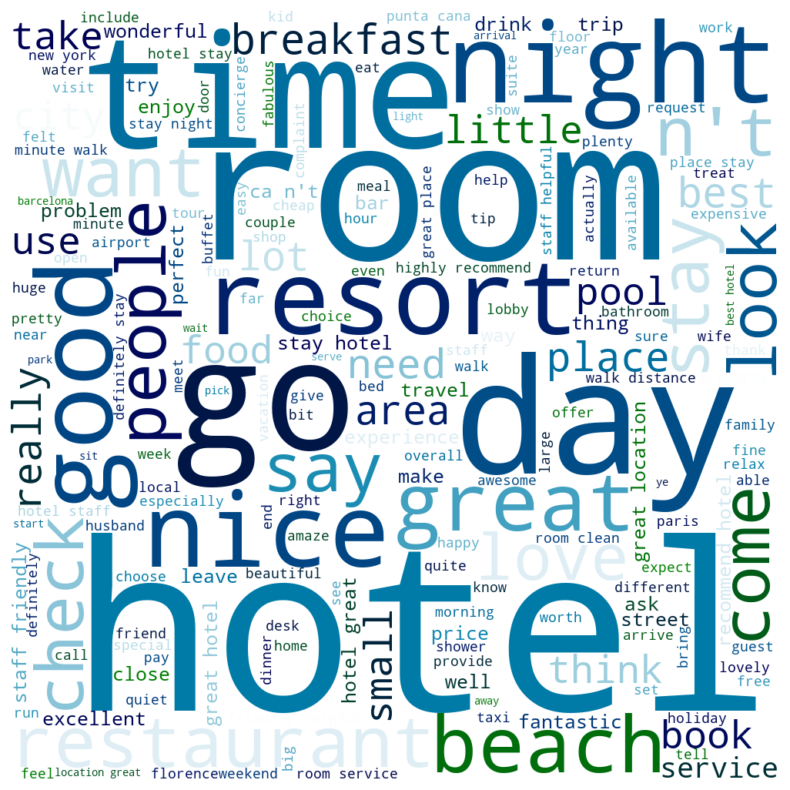

In [29]:
# WordCloud for Positive Review

wordCloud_generator(train_pos, 'white', 'ocean')

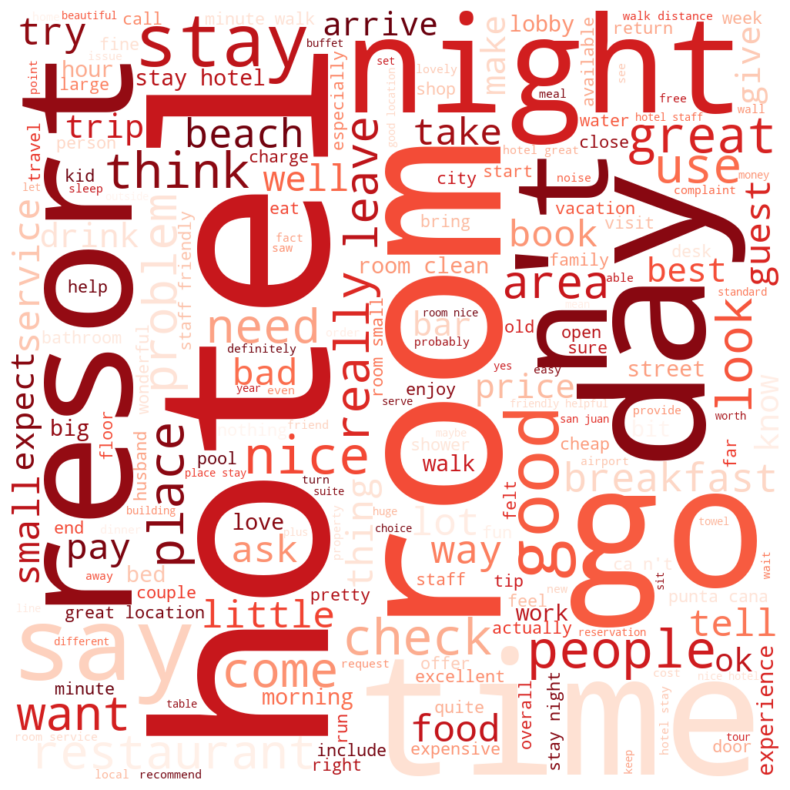

In [30]:
# WordCloud for Positive Review

wordCloud_generator(train_neg, 'white', 'Reds')

Based on the figure, there is only slight difference between Positive Reviews and Negative Reviews. Both review are dominated with words like hotel, room, stay, time. But, in Positive Reviews there are also other words, that much more positive and constructive, such as excellent, fantastic, beautiful, wonderful, and love. While Negative Reviews contains neutral to negative words, such as bad,expensive ,problem, small, service, and leave.

It means that even though both Positive and Negative Reviews mostly consist the same words, but it has different meaning.

<Axes: ylabel='count'>

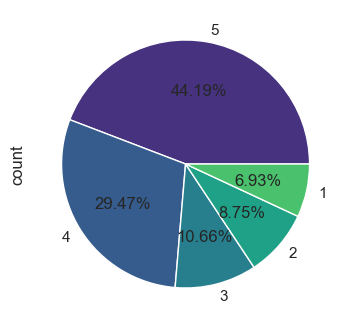

In [31]:
sns.set_theme(style='darkgrid',palette='viridis')
plt.figure(figsize=(4,5))
df['Rating'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

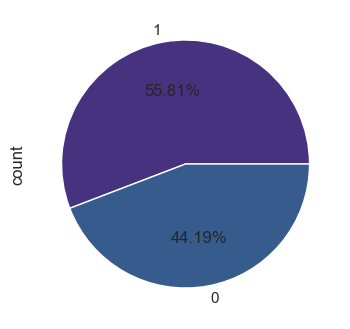

In [32]:
plt.figure(figsize=(4,5))
df['Rating_1'].value_counts().plot(kind='pie', autopct='%0.2f%%') # 44.41% rating is equal to 5

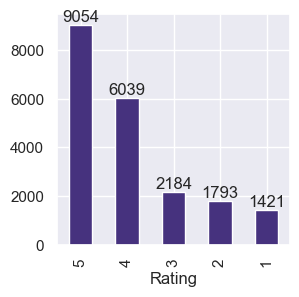

In [33]:
plt.figure(figsize=(3,3))
barplot = df['Rating'].value_counts().plot(kind='bar')

for i in barplot.containers:
    barplot.bar_label(i)

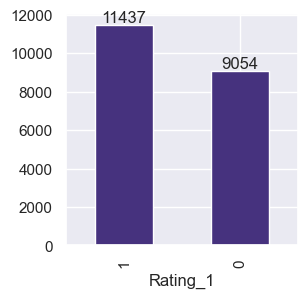

In [34]:
plt.figure(figsize=(3,3))
bar = df['Rating_1'].value_counts().plot(kind='bar')

for i in bar.containers:
    bar.bar_label(i)         # 1 = Negative review and 0 = Positive Review

C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_23364\3960664217.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['pos'],color='blue',label='Positive Review')
C:\Users\Mohan Gola\AppData\Local\Temp\ipykernel_23364\3960664217.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['

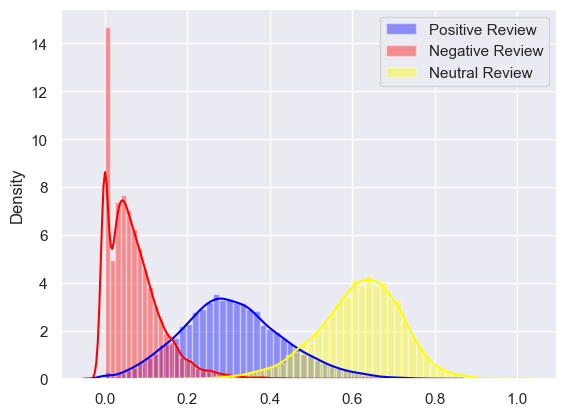

In [35]:
# plot sentiment distribution for Positive and Negative and Neutral reviews

import seaborn as sns

sns.distplot(x = df['pos'],color='blue',label='Positive Review')
sns.distplot(x = df['neg'],color='red',label='Negative Review')
sns.distplot(x = df['neu'],color='yellow',label='Neutral Review')
plt.legend()

In [36]:
# Top 10 positive reviews

df[df['No_words'] >= 5].sort_values('pos', ascending = False)[['Cleaned_Review','pos']].head(10)

,Cleaned_Review,pos
13123,perfect impressive place want clean comfy room...,0.818
4073,hotel great hotel great money clean good restu...,0.799
15066,regular amaze value stay hotel let great bed g...,0.796
10778,fantastic value money good value money great l...,0.792
7709,great hotel love hotel location perfect staff ...,0.787
598,incredible value great price expedia package b...,0.777
10819,truely fantastic hotel great hotel staff super...,0.765
2346,best hotel hotel gorgeous beautiful clean spac...,0.763
5175,fabulous trip stay night wish long hotel great...,0.757
7240,wonderful hotel perfect place stay excellent l...,0.756


In [37]:
# Top 10 negative reviews

df[df['No_words'] >= 5].sort_values('neg', ascending = False)[['Cleaned_Review','neg']].head(10)

,Cleaned_Review,neg
9514,bad hotel really awful place dirty room rude s...,0.646
19891,bad bad bad hotel verry bad pls stay close ram...,0.645
65,hat inn terrible room-service horrible staff u...,0.544
4280,hurry leave really suck terrible food cold cli...,0.529
4740,worn noisy worn noisy remodel future price ref...,0.527
14190,extremely disappointing experience disappointi...,0.507
6484,poor quality stay absolutely terrible sound pr...,0.488
16633,bad hotel room awful window poor light extreme...,0.477
14843,bad bad lie n't believe photo hotel web site p...,0.476
16240,eh didnt like room hotel super small bathroom ...,0.461


for Positive Reviews, the reviews dominated with words that show high customer satisfaction, such as great, excellent, fabulous, and adore. While for Negative Reviews, dominated with words that show low customer satisfaction, such as bad, horrify, awful, and disappointing.

Even though both Positive and Negative Reviews almost share the same words, but each word give different interpretation. Word like hotel, room, stay, time in positive reviews, indicated that customer felt happy, and delighted with it. While in Negative Reviews, the same words (hotel, room, stay, time ) indicated customer complain for it.


# Machine Learning Model
## Data Pre-Processing

As we know 0 = Positive Review and 1 = Negative Review in Rating_1 column

In [38]:
# drop the Review and Cleaned_Review Column, because we won't use it.

df = df.drop(['Review', 'Cleaned_Review'], axis = 1)

In [39]:
# Split dataset

x = df.drop(['Rating_1'],axis = 1)
y = df['Rating_1']

In [40]:
from sklearn.model_selection import train_test_split # creating train and test data

In [41]:
xtrain_rf,xtest_rf,ytrain_rf,ytest_rf = train_test_split(x,y,test_size=0.25,random_state=42)

In [42]:
from sklearn.ensemble import RandomForestClassifier # learning algorithm Random Forest
from sklearn.linear_model import LogisticRegression # learning algorithm Logistic Regression
from sklearn.svm import SVC # Learning algorithm Support Vector Classifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import roc_auc_score, recall_score
from sklearn import tree # for modeling
from sklearn.metrics import classification_report,confusion_matrix # for classification report

# 1) Random Forest Classifier

In [43]:
# train the model

model = RandomForestClassifier(random_state=42)
model.fit(xtrain_rf, ytrain_rf)
preds = model.predict(xtest_rf)

In [44]:
print(classification_report(ytest_rf,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2221
           1       1.00      1.00      1.00      2902

    accuracy                           1.00      5123
   macro avg       1.00      1.00      1.00      5123
weighted avg       1.00      1.00      1.00      5123



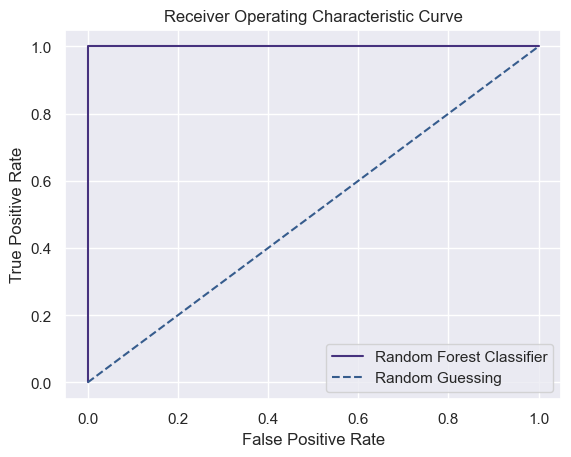

In [45]:
# ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(ytest_rf,preds)
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

<Axes: >

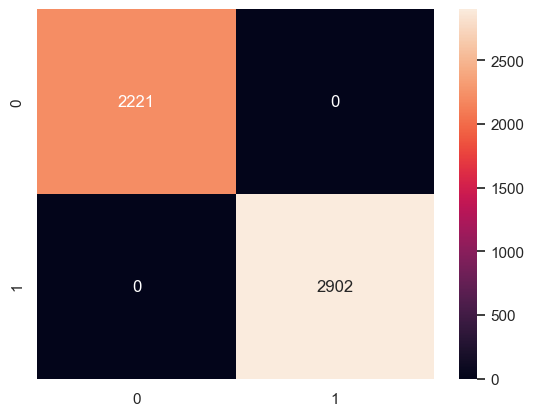

In [46]:
sns.heatmap(confusion_matrix(ytest_rf,preds),annot=True,fmt='g')

In [47]:
model.score(xtrain_rf,ytrain_rf),model.score(xtest_rf,ytest_rf) #the model that we got is Robust/Generalized.

(1.0, 1.0)

Random Forest modeling able to achieve 98% precision for negative reviews, it means that 98% negative reviews are correctly classified as negative reviews. For positive reviews, it achieved 100%, it means that all positive reviews are classified as positive reviews and none of the positive reviews are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only.In this case, our model able to predicted that 100% from the dataset are True Positive for negative reviews, and 98% from the dataset are True Positive for positive reviews.

F1-score value measures how many times the model made a correct prediction accurately. Our Random Forest Classifier model able to predict 99% correctly for negative reviews and 99% correctly for positive reviews.

# 2) Logistic Regression

In [48]:
xtrain_lr,xtest_lr,ytrain_lr,ytest_lr = train_test_split(x,y,test_size=0.3,random_state=42)

In [49]:
# train the model

lr = LogisticRegression(random_state=42)
lr.fit(xtrain_lr, ytrain_lr)
preds_1 = lr.predict(xtest_lr)

c:\Users\Mohan Gola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print(classification_report(ytest_lr,preds_1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2661
           1       1.00      0.99      1.00      3487

    accuracy                           1.00      6148
   macro avg       1.00      1.00      1.00      6148
weighted avg       1.00      1.00      1.00      6148



In [51]:
lr.score(xtrain_lr,ytrain_lr),lr.score(xtest_lr,ytest_lr)

(0.9965836993655441, 0.9965842550422902)

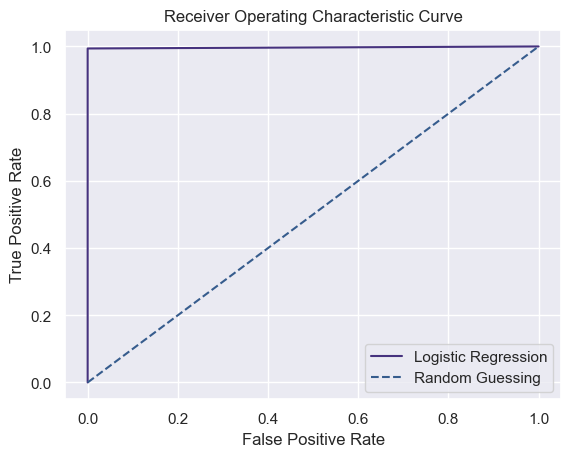

In [52]:
# ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(ytest_lr,preds_1)
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

<Axes: >

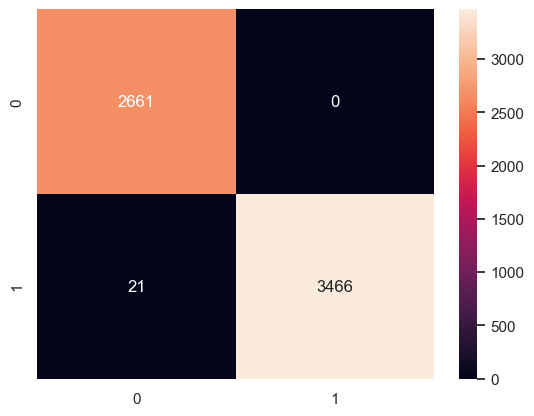

In [53]:
sns.heatmap(confusion_matrix(ytest_lr,preds_1),annot=True,fmt='g')

Precision value equal to 100% for 1, means that all negative reviews are classified as negative reviews and none of them are classified incorrectly. While precision value for positive reviews equal to 99% for 0, it means that 99% of positive reviews are classified as positive reviews and 1% of the positive reviews are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 99% from the dataset are True Positive for negative reviews, and 100% from the dataset are True Positive for positive reviews.

F1-score value measures how many times the model made a correct prediction accurately. Our logistic regression model able to predict 100% correctly for negative reviews and 99% correctly for positive reviews.

# 3) Support Vector Machinne

In [54]:
xtrain_sv,xtest_sv,ytrain_sv,ytest_sv = train_test_split(x,y,test_size=0.20,random_state=42)

In [55]:
# train the model

svc = SVC(kernel='linear',random_state=42)  # Kernel is used to add axis to see if they are Linearly or Non-linearly separable or not

svc.fit(xtrain_sv,ytrain_sv)
preds_2 = svc.predict(xtest_sv)
print(svc.score(xtrain_sv,ytrain_sv))
print(svc.score(xtest_sv,ytest_sv))


1.0
1.0


In [56]:
print(classification_report(ytest_sv,preds_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1790
           1       1.00      1.00      1.00      2309

    accuracy                           1.00      4099
   macro avg       1.00      1.00      1.00      4099
weighted avg       1.00      1.00      1.00      4099



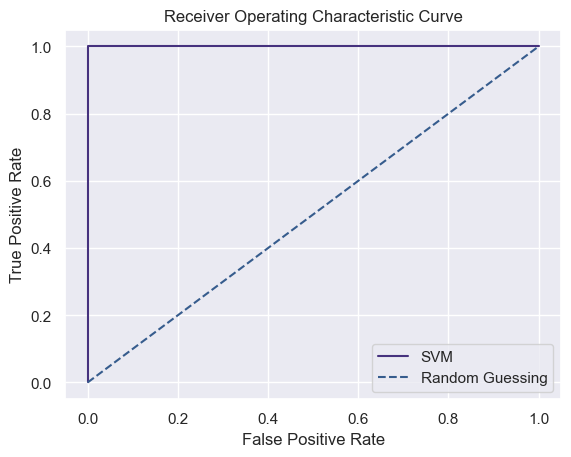

In [57]:
# ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(ytest_sv,preds_2)
plt.plot(fpr,tpr,label='SVM')
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

<Axes: >

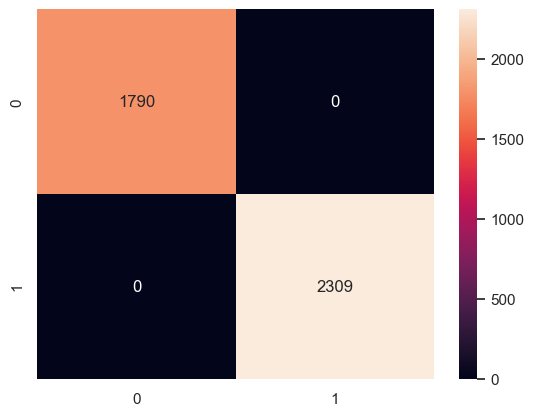

In [58]:
sns.heatmap(confusion_matrix(ytest_sv,preds_2),annot=True,fmt='g')

Precision value equal to 100% for 1, means that all negative reviews are classified as negative reviews and none of them are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of positive reviews are classified as positive reviews and none of the positive reviews are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True Positive for negative reviews, and 100% from the dataset are True Positive for positive reviews.

F1-score value measures how many times the model made a correct prediction accurately. Our Support Vector Machine model able to predict 100% correctly for negative reviews and 100% correctly for positive reviews.

# 4) Naive Bayes Classifier

In [59]:
xtrain_nb,xtest_nb,ytrain_nb,ytest_nb = train_test_split(x,y,test_size=0.30,random_state=42)

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb = GaussianNB()
nb.fit(xtrain_nb,ytrain_nb)
preds_3 = nb.predict(xtest_nb)

In [62]:
nb.score(xtrain_nb,ytrain_nb),nb.score(xtest_nb,ytest_nb)

(0.9845220665132818, 0.9858490566037735)

In [63]:
print(classification_report(ytest_nb,preds_3))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2661
           1       0.98      1.00      0.99      3487

    accuracy                           0.99      6148
   macro avg       0.99      0.98      0.99      6148
weighted avg       0.99      0.99      0.99      6148



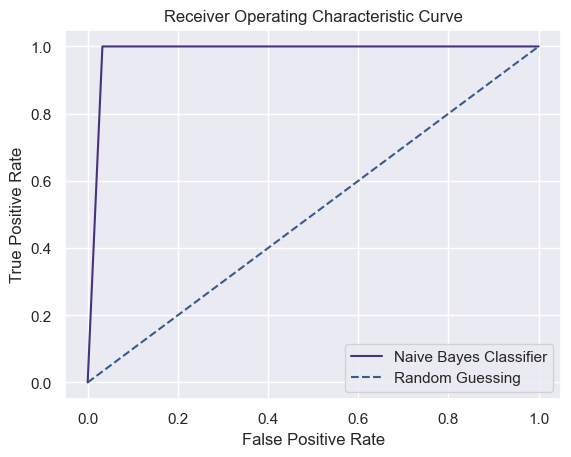

In [64]:
# ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(ytest_nb,preds_3)
plt.plot(fpr,tpr,label='Naive Bayes Classifier')
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

<Axes: >

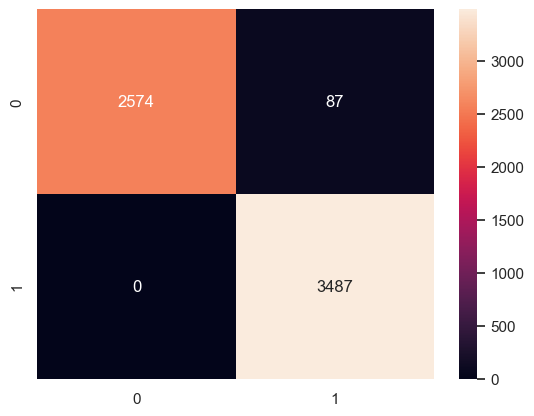

In [65]:
sns.heatmap(confusion_matrix(ytest_nb,preds_3),annot=True,fmt='g')

Precision value equal to 84% for 1, means that 84% negative reviews are classified as negative reviews and 16% of negative reviews are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of positive reviews are classified as positive reviews and none of the positive reviews are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True Positive for negative reviews, and 75% from the dataset are True Positive for positive reviews.

F1-score value measures how many times the model made a correct prediction accurately. Our Support Vector Machine model able to predict 91% correctly for negative reviews and 86% correctly for positive reviews.

# 5) K-Nearest Neighbours Classifier

In [66]:
xtrain_kn,xtest_kn,ytrain_kn,ytest_kn = train_test_split(x,y,test_size=0.30,random_state=42)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain_kn,ytrain_kn)
preds_4 = knn.predict(xtest_kn)

In [69]:
knn.score(xtrain_kn,ytrain_kn), knn.score(xtest_kn,ytest_kn)

(0.924492783936415, 0.8040013012361744)

## Hyperparameter Tuning

In [70]:
train_acc = []
test_acc = []


for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain_kn,ytrain_kn)
    train_acc.append(knn.score(xtrain_kn,ytrain_kn))
    test_acc.append(knn.score(xtest_kn,ytest_kn))

In [71]:
train_acc

[1.0,
 0.9008575611796695,
 0.924492783936415,
 0.8749912849473611,
 0.8860071114829533,
 0.8575611796695252,
 0.8619535661995399,
 0.8377605800739036,
 0.8441748588161473,
 0.8222826465871854,
 0.830718817541658,
 0.813079551000488,
 0.8160775291082758,
 0.7996932301471101,
 0.8045039392037928,
 0.7925120267726417,
 0.7969741337237677,
 0.7847033396081712,
 0.7897929303492993,
 0.7791257059192638,
 0.7860977480303981,
 0.7787073833925957,
 0.7841455762392805,
 0.7758488461270306,
 0.7795440284459318,
 0.7689465244370076,
 0.7706895349647912,
 0.7639266541169909,
 0.7671337934881126,
 0.7608589555880918,
 0.7623928048525414,
 0.7539566338980688,
 0.753817193055846,
 0.7488670431569406,
 0.748518441051384,
 0.7446140974691488,
 0.7441260545213693,
 0.7394547863069093,
 0.7410583559924702,
 0.739175904622464,
 0.7394547863069093,
 0.7355504427246741,
 0.7357596039880081,
 0.7308094540891027,
 0.7340165934602245,
 0.7296242069302099,
 0.730879174510214,
 0.7263473471379767,
 0.72829951892

In [72]:
test_acc

[0.8148991541964866,
 0.7635003253090435,
 0.8040013012361744,
 0.7672413793103449,
 0.7924528301886793,
 0.7620364346128823,
 0.779277813923227,
 0.7521145087833442,
 0.7672413793103449,
 0.746096291476903,
 0.7568314899154196,
 0.738939492517892,
 0.7454456733897202,
 0.7356864020819779,
 0.7446324007807417,
 0.7270657124268055,
 0.7395901106050748,
 0.7319453480806767,
 0.7397527651268705,
 0.7329212752114509,
 0.7425178919973975,
 0.7308067664281067,
 0.7368249837345479,
 0.7275536759921926,
 0.7342225113858165,
 0.7275536759921926,
 0.7347104749512037,
 0.7231620039037086,
 0.7311320754716981,
 0.7218607677293428,
 0.725113858165257,
 0.7173064411190632,
 0.7164931685100846,
 0.7122641509433962,
 0.7173064411190632,
 0.7108002602472349,
 0.7142160052049447,
 0.7103122966818478,
 0.7119388418998048,
 0.7065712426805465,
 0.7088484059856864,
 0.7034808067664281,
 0.705757970071568,
 0.7041314248536109,
 0.7021795705920625,
 0.6979505530253741,
 0.6999024072869225,
 0.696161353285621

Text(0.5, 1.0, 'K-Value Map')

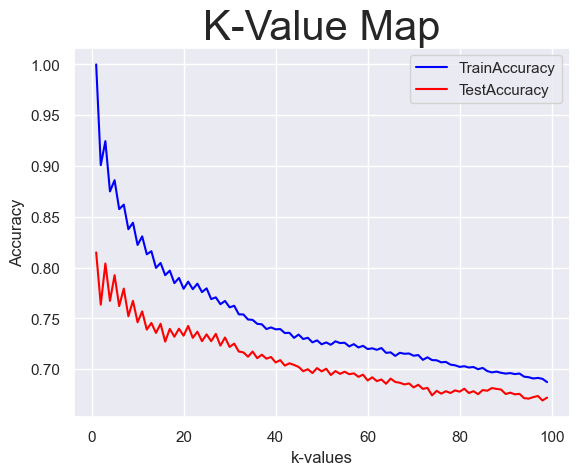

In [73]:
plt.plot(range(1,100),train_acc,color='blue',label='TrainAccuracy')
plt.plot(range(1,100),test_acc,color='red',label='TestAccuracy')
plt.xlabel('k-values')
plt.ylabel('Accuracy')
plt.legend()
plt.title('K-Value Map',size=30)

In [74]:
knn = KNeighborsClassifier(n_neighbors=72)
knn.fit(xtrain_kn,ytrain_kn)
preds_4_kn = knn.predict(xtest_kn)
knn.score(xtrain_kn,ytrain_kn), knn.score(xtest_kn,ytest_kn)

(0.7091264031234749, 0.6805465191932336)

In [75]:
print(classification_report(ytest_kn,preds_4_kn))

              precision    recall  f1-score   support

           0       0.64      0.60      0.62      2661
           1       0.71      0.75      0.73      3487

    accuracy                           0.68      6148
   macro avg       0.67      0.67      0.67      6148
weighted avg       0.68      0.68      0.68      6148



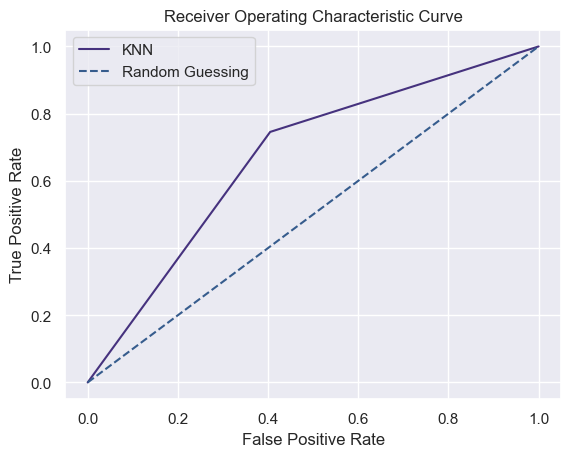

In [76]:
# ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(ytest_kn,preds_4_kn)
plt.plot(fpr,tpr,label='KNN')
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

<Axes: >

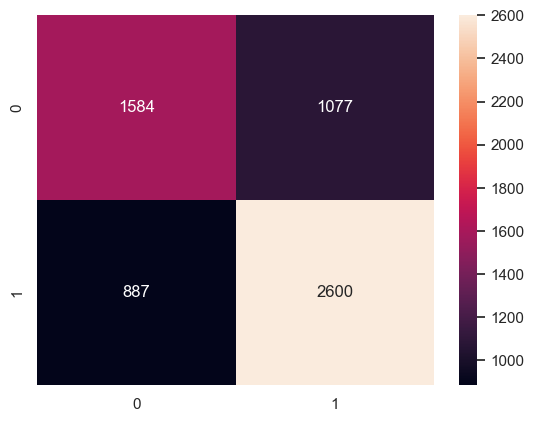

In [77]:
sns.heatmap(confusion_matrix(ytest_kn,preds_4_kn),annot=True,fmt='g')

Precision value equal to 59% for 1, means that 59% negative reviews are classified as negative reviews and 41% of negative reviews are classified incorrectly. While precision value for positive reviews equal to 51% for 0, it means that 51% of positive reviews are classified as positive reviews and 49% of the positive reviews are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 78% from the dataset are True Positive for negative reviews, and 29% from the dataset are True Positive for positive reviews.

F1-score value measures how many times the model made a correct prediction accurately. Our K-Neighbours Classifier model able to predict 68% correctly for negative reviews and 37% correctly for positive reviews.

# 6) Decision Tree Classifier

In [78]:
xtrain_dt,xtest_dt,ytrain_dt,ytest_dt = train_test_split(x,y,test_size=0.30,random_state=42)

In [79]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [80]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain_dt,ytrain_dt)
preds_5 = dtc.predict(xtest_dt)

In [81]:
dtc.score(xtrain_dt,ytrain_dt),dtc.score(xtest_dt,ytest_dt)

(1.0, 1.0)

In [82]:
print(classification_report(ytest_dt,preds_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2661
           1       1.00      1.00      1.00      3487

    accuracy                           1.00      6148
   macro avg       1.00      1.00      1.00      6148
weighted avg       1.00      1.00      1.00      6148



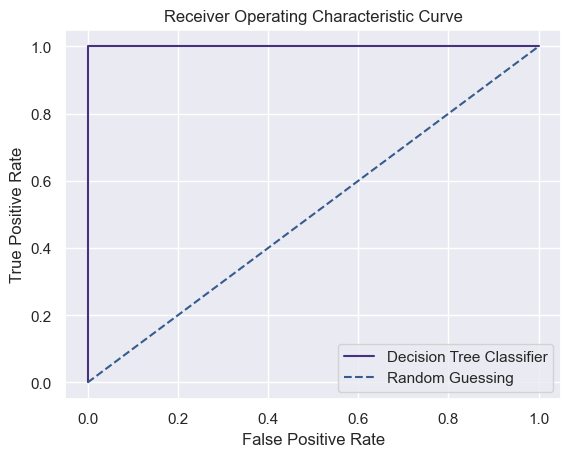

In [83]:
# ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(ytest_dt,preds_5)
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

<Axes: >

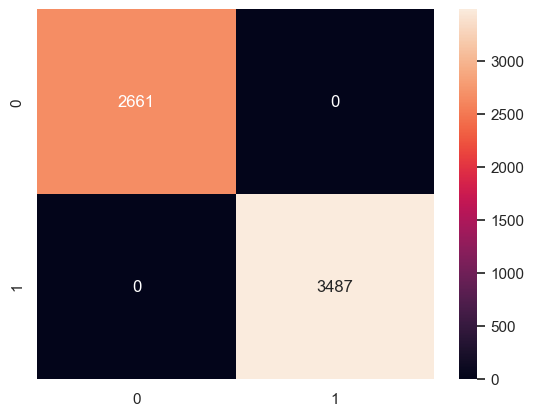

In [84]:
sns.heatmap(confusion_matrix(ytest_dt,preds_5),annot=True,fmt='g')

Precision value equal to 100% for 1, means that all negative reviews are classified as negative reviews and none of them are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of positive reviews are classified as positive reviews and none of the positive reviews are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True Positive for negative reviews, and 100% from the dataset are True Positive for positive reviews.

F1-score value measures how many times the model made a correct prediction accurately. Our Decision Tree Classifier model able to predict 100% correctly for negative reviews and 100% correctly for positive reviews.

# 7) Gradient Boosting Classifier

In [85]:
xtrain_gb,xtest_gb,ytrain_gb,ytest_gb = train_test_split(x,y,test_size=0.20,random_state=42)

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain_gb,ytrain_gb)
preds_6 = gbc.predict(xtest_gb)

In [88]:
gbc.score(xtrain_gb,ytrain_gb),gbc.score(xtest_gb,ytest_gb)

(1.0, 1.0)

In [89]:
print(classification_report(ytest_gb,preds_6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1790
           1       1.00      1.00      1.00      2309

    accuracy                           1.00      4099
   macro avg       1.00      1.00      1.00      4099
weighted avg       1.00      1.00      1.00      4099



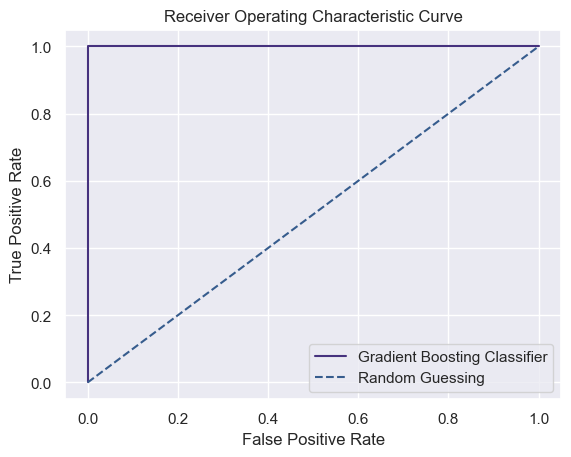

In [90]:
# ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(ytest_gb,preds_6)
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

<Axes: >

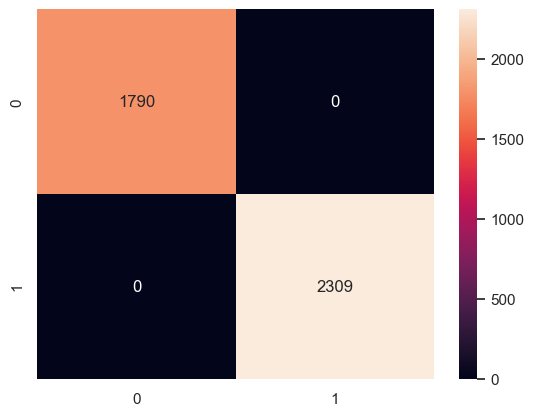

In [91]:
sns.heatmap(confusion_matrix(ytest_gb,preds_6),annot=True,fmt='g')

Precision value equal to 100% for 1, means that all negative reviews are classified as negative reviews and none of them are classified incorrectly. While precision value for positive reviews equal to 100% for 0, it means that 100% of positive reviews are classified as positive reviews and none of the positive reviews are classified incorrectly.

Recall value or True Positive Rate (TPR), tells us the ability of model to predict positive class as positive only. In this case, our model able to predicted that 100% from the dataset are True Positive for negative reviews, and 100% from the dataset are True Positive for positive reviews.

F1-score value measures how many times the model made a correct prediction accurately. Our Gradient Boosting Classifier model able to predict 100% correctly for negative reviews and 100% correctly for positive reviews.

### Model Validation Techniques = (K-fold Cross Validation)

We use this technique when we have moderate amount of dataset. K = No. of groups wee want to create and Fold = Groups

In [92]:
from sklearn.model_selection import KFold,cross_val_score

In [93]:
#Random Forest Classifier

kf = KFold(n_splits=5)
scores = cross_val_score(RandomForestClassifier(random_state=42),x,y,cv=kf)
scores                                                                          #This will give 5 accuracy as n_split=5

array([1., 1., 1., 1., 1.])

In [94]:
scores.mean()   #This will give overall accuracy

1.0

In [95]:
#Logistic Regression

kf1 = KFold(n_splits=5)
scores1 = cross_val_score(LogisticRegression(random_state=42),x,y,cv=kf1)
scores1                                                                         #This will give 5 accuracy as n_split=5

c:\Users\Mohan Gola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mohan Gola\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

array([0.99707246, 0.99365544, 0.99536359, 0.99633968, 0.99975598])

In [96]:
scores1.mean()   #This will give overall accuracy

0.9964374293578967

In [97]:
#Naive Bayes Classifier

kf3 = KFold(n_splits=5)
scores3 = cross_val_score(GaussianNB(),x,y,cv=kf3)
scores3                                                                          #This will give 5 accuracy as n_split=5

array([0.98145889, 0.98657882, 0.99414348, 0.98877501, 0.97779405])

In [98]:
scores3.mean()   #This will give overall accuracy

0.9857500508105217

In [99]:
#K-Nearest Neighbours Classifier

kf4 = KFold(n_splits=5)
scores4 = cross_val_score(KNeighborsClassifier(n_neighbors=72),x,y,cv=kf4)
scores4                                                                          #This will give 5 accuracy as n_split=5

array([0.69895096, 0.70619815, 0.70278184, 0.68496828, 0.68326013])

In [100]:
scores4.mean()   #This will give overall accuracy

0.6952318715976746

In [101]:
#Decision Tree Classifier

kf5 = KFold(n_splits=5)
scores5 = cross_val_score(DecisionTreeClassifier(),x,y,cv=kf5)
scores5                                                                          #This will give 5 accuracy as n_split=5

array([1., 1., 1., 1., 1.])

In [102]:
scores5.mean()   #This will give overall accuracy

1.0

In [103]:
#Gradient Boosting Classifier

kf6 = KFold(n_splits=5)
scores6 = cross_val_score(GradientBoostingClassifier(),x,y,cv=kf6)
scores6                                                                          #This will give 5 accuracy as n_split=5

array([1., 1., 1., 1., 1.])

In [104]:
scores6.mean()   #This will give overall accuracy

1.0

In [110]:
df = pd.read_excel("hotel_reviews.xlsx")
df['Rating_1'] = np.where(df['Rating'] > 4,1,0)

In [111]:
df1 =df[['Review','Rating_1']]
df1.head()

,Review,Rating_1
0,nice hotel expensive parking got good deal sta...,0
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1


In [112]:
df1['Review_clean'] = df1['Review'].apply(lambda x: clean_text(x))

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [114]:
corpus = df1['Review_clean'].values

In [115]:
count_tf_idf = TfidfVectorizer()
tf_idf = count_tf_idf.fit_transform(corpus)

In [ ]:
import pickle

In [116]:
#pickle.dump(count_tf_idf, open("tf_idf2.pkt", "wb"))

In [117]:
tf_idf_train, tf_idf_test, target_train, target_test = train_test_split(
    tf_idf, df1['Rating_1'], test_size = 0.8, random_state= 42, shuffle=True
)

In [118]:
model_bayes = MultinomialNB()

In [119]:
model_bayes = model_bayes.fit(tf_idf_train, target_train)

In [120]:
y_pred_proba = model_bayes.predict_proba(tf_idf_test)[::, 1]
y_pred_proba

array([0.07154719, 0.08329304, 0.26508609, ..., 0.15186037, 0.43878711,
       0.16357644])

In [121]:

y_pred_proba

array([0.07154719, 0.08329304, 0.26508609, ..., 0.15186037, 0.43878711,
       0.16357644])

In [122]:
fpr, tpr, _ = roc_curve(target_test, y_pred_proba)

In [123]:
final_roc_auc = roc_auc_score(target_test, y_pred_proba)

In [124]:
final_roc_auc

0.8197337346048321

In [125]:
test_text = "Hotel is Good"
test_tfidf = count_tf_idf.transform([test_text])
display(model_bayes.predict_proba(test_tfidf))
display(model_bayes.predict(test_tfidf))

array([[0.43295395, 0.56704605]])

array([1])

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
model = RandomForestClassifier(random_state=42)
model.fit(tf_idf_train,target_train)
preds = model.predict(tf_idf_test)

In [128]:
y_pred_proba_rf = model.predict_proba(tf_idf_test)[::, 1]


In [129]:
y_pred_proba_rf

array([0.31, 0.43, 0.41, ..., 0.45, 0.44, 0.27])

In [ ]:
pickle.dump(model_bayes, open("Naive_Bayes.pkt", "wb"))

In [130]:
from xgboost import XGBClassifier

In [131]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(tf_idf_train,target_train)
preds2 = model_xgb.predict(tf_idf_test)

In [132]:
y_pred_proba_xgb = model_xgb.predict_proba(tf_idf_test)[::, 1]
y_pred_proba_xgb

array([0.03360287, 0.46106705, 0.03789431, ..., 0.8519608 , 0.6817129 ,
       0.06432341], dtype=float32)

In [133]:
final_roc_auc = roc_auc_score(target_test, y_pred_proba_xgb)
final_roc_auc

0.8234108455104729